In [1]:
!pip install python-binance

     |████████████████████████████████| 71kB 2.9MB/s eta 0:00:01
     |████████████████████████████████| 286kB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 184kB 3.0MB/s eta 0:00:01


In [54]:
from binance import Client 

In [70]:
#real
api_key="DI9JAUXzSHePNL9CgVViOomtHWhkyHa5qsJQ0x3XlYMl5yCfnL9FH2o1fciPzP7z"
api_secret="6tdQnKFVeIMW8mzMmr6bEMddcoJSzvvdnlDBVQpEBekDyOra2o65tO2FU7Srg4X0"

In [74]:
api_key="YOkO7Rzu3UcHJ1ovV1wdOwEfaXbp3Tl5YC1JqYMSKqoRi6a2KNkUH7WOC4APd9gI"
api_secret="FIMdZGohpeSeiUFglepmrrvufaeteMRwEfxO8kEx73iibKSzf717MFed1U7o1jd6"

In [56]:
import pandas as pd

In [75]:
client = Client(api_key,api_secret,testnet=True)

In [119]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'updateTime': 1632433808353,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '0.97000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '11337.58559996', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

In [59]:
#datastream as websocket
#https://python-binance.readthedocs.io/en/latest/


In [ ]:
order = client.create_order(symbol="BTCUSDT",
                    side='SELL',
                   type='MARKET',
                   quantity=0.001)

In [62]:
def get_data(symbol,interval,lookback):
    df = pd.DataFrame(client.get_historical_klines(symbol,interval,lookback + " ago UTC"))
    df = df.iloc[:,:6]
    df.columns = ["Time", "Open", "High", "Low","Close","Volume"]
    df = df.set_index("Time")
    df.index = pd.to_datetime(df.index, unit='ms')
    df = df.astype(float)
    return df

In [63]:
btc=get_data("BTCUSDT","1m",'30 min')

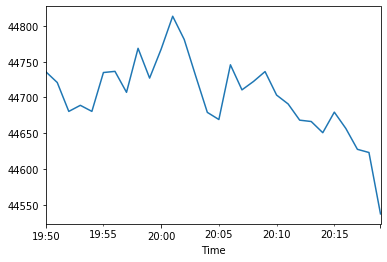

In [64]:
btc.Open.plot()

In [51]:
#buy if asset fell by more than 0.2% within the last 30 min
#sell if asset raises by more then 0.15% or falls further by 0.15%

In [110]:
from time import sleep

In [114]:
import time
def strategytest(symbol,qty,entered=False):
    
    df = get_data(symbol,'1m','30m')
    
    cumulret = (df.Open.pct_change() +1 ).cumprod() - 1
    print(cumulret[-1])
    if not entered:
        if cumulret[-1] < -0.002:
            order = client.create_order(symbol=symbol,
                                        side='BUY',
                                       type='MARKET',
                                       quantity=qty)
            print(order)
            entered=True
            
        else:
            print("No Trade has been executed")
            sleep(60)
        
    if entered:
        while True:
            df = get_data(symbol,'1m','30m')
            sincebuy = df.loc[df.index > pd.to_datetime(
                order['transactTime'], unit='ms')]
            
            if len(sincebuy) > 0:
                sincebuyret = (df.Open.pct_change() +1 ).cumprod() - 1
                if sincebuyret[-1] > 0.0015 or sincebuyret[-1] < -0.0015:
                    order = client.create_order(symbol=symbol,
                                        side='SELL',
                                       type='MARKET',
                                       quantity=qty)
            
                    print(order)
                    entered=False

In [118]:
while True:
    
    strategytest('BTCUSDT', 0.01)

-0.0004955791829883704
No Trade has been executed
-0.0008353908617996231
No Trade has been executed
-0.00018153358046668622
No Trade has been executed
-0.0008497740795421205
No Trade has been executed
-0.0013053878665563179
No Trade has been executed
-0.0014149650495357546
No Trade has been executed
-0.001392474820942402
No Trade has been executed
-0.0015865766219163024
No Trade has been executed
-0.0011545971834453495
No Trade has been executed
0.00015840123638133363
No Trade has been executed
7.170677129297864e-05
No Trade has been executed
0.0003528235642176192
No Trade has been executed
-0.0004895361919285968
No Trade has been executed
-0.0010200819383622273
No Trade has been executed
-0.0019023357152105902
No Trade has been executed
-0.001838706382246813
No Trade has been executed
-0.002374226821649783
{'symbol': 'BTCUSDT', 'orderId': 5139271, 'orderListId': -1, 'clientOrderId': 'ftVidrabiWQE8s0aeTBfDz', 'transactTime': 1632433567700, 'price': '0.00000000', 'origQty': '0.01000000'

KeyboardInterrupt: 